In [237]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [238]:
# File to Load
ride_data_df = pd.read_csv("ride_data.csv")
city_data_df = pd.read_csv("city_data.csv")

In [239]:
# Read the City Data
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [240]:
# Combine the data into a single dataset
ride_city_data_df = pd.merge(ride_data_df, city_data_df, on='city', how='left')

In [241]:
# Display the data table for preview
ride_city_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [242]:
# write the file for verification
ride_city_data_df.to_csv("ride_city_data.csv", encoding='utf-8', index=False)

# Bubble Plot of Ride Sharing Data

In [243]:
# Urban dataframes
only_urban_df = ride_city_data_df.loc[ride_city_data_df["type"] == "Urban", :]
only_urban_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [244]:
ride_count_urban = only_urban_df.groupby(['city'])
ride_urban_total = ride_count_urban["ride_id"].count()
#ride_urban_total

# Max ride per city
max_ride_urban = ride_urban_total.max()
max_ride_urban

39

In [245]:
ride_urban_total_df = pd.DataFrame(ride_urban_total)
ride_urban_total_df.head()

,ride_id
city,
Amandaburgh,18
Barajasview,22
Carriemouth,27
Christopherfurt,27
Deanville,19


In [246]:
fare_count_urban = only_urban_df.groupby(['city'])
fare_urban_total = fare_count_urban["fare"].mean()
#fare_urban_total

max_fare_urban = fare_urban_total.max()
max_fare_urban

28.993749999999995

In [247]:
fare_urban_total_df = pd.DataFrame(fare_urban_total)
fare_urban_total_df.head()

,fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Carriemouth,28.314444
Christopherfurt,24.501852
Deanville,25.842632


In [248]:
result_urban_df = pd.concat([ride_urban_total_df, fare_urban_total_df], axis=1)
result_urban_df.head()

,ride_id,fare
city,,
Amandaburgh,18,24.641667
Barajasview,22,25.332273
Carriemouth,27,28.314444
Christopherfurt,27,24.501852
Deanville,19,25.842632


In [249]:
result_urban_rideid = result_urban_df["ride_id"].tolist()
#result_urban_rideid

In [250]:
result_urban_fare = result_urban_df["fare"].tolist()
#result_urban_fare

<function matplotlib.pyplot.show(*args, **kw)>

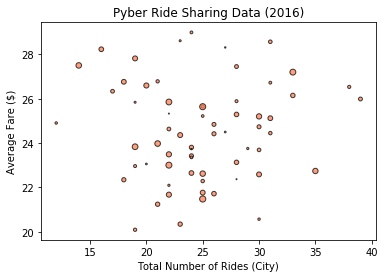

In [251]:
plt.scatter(result_urban_rideid, result_urban_fare, marker="o", facecolors="coral", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (City)")
plt.ylabel("Average Fare ($)")
plt.show

In [252]:
# Suburban dataframes
only_suburban_df = ride_city_data_df.loc[ride_city_data_df["type"] == "Suburban", :]
only_suburban_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2018-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2018-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2018-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2018-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2018-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [253]:
ride_count_suburban = only_suburban_df.groupby(['city'])
ride_suburban_total = ride_count_suburban["ride_id"].count()
#ride_suburban_total

# Max ride per city
max_ride_suburban = ride_suburban_total.max()
max_ride_suburban

27

In [254]:
ride_suburban_total_df = pd.DataFrame(ride_suburban_total)
ride_suburban_total_df.head()

,ride_id
city,
Barronchester,16
Bethanyland,18
Brandonfort,19
Colemanland,22
Davidfurt,17


In [255]:
fare_count_suburban = only_suburban_df.groupby(['city'])
fare_suburban_total = fare_count_suburban["fare"].mean()
#fare_suburban_total

# Max fare per city
max_fare_suburban = fare_suburban_total.max()
max_fare_suburban

36.42249999999999

In [256]:
fare_suburban_total_df = pd.DataFrame(fare_suburban_total)
fare_suburban_total_df.head()

,fare
city,
Barronchester,36.422500
Bethanyland,32.956111
Brandonfort,35.437368
Colemanland,30.894545
Davidfurt,31.995882


In [257]:
result_suburban_df = pd.concat([ride_suburban_total_df, fare_suburban_total_df], axis=1)
result_suburban_df.head()

,ride_id,fare
city,,
Barronchester,16,36.422500
Bethanyland,18,32.956111
Brandonfort,19,35.437368
Colemanland,22,30.894545
Davidfurt,17,31.995882


In [258]:
result_suburban_rideid = result_suburban_df["ride_id"].tolist()
#result_suburban_rideid

In [259]:
result_suburban_fare = result_suburban_df["fare"].tolist()
#result_suburban_fare

<function matplotlib.pyplot.show(*args, **kw)>

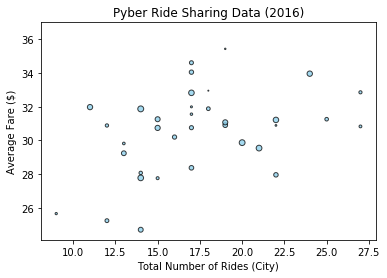

In [260]:
plt.scatter(result_suburban_rideid, result_suburban_fare, marker="o", facecolors="skyblue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (City)")
plt.ylabel("Average Fare ($)")
plt.show

In [261]:
# Rural dataframes
only_rural_df = ride_city_data_df.loc[ride_city_data_df["type"] == "Rural", :]
only_rural_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2018-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2018-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2018-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2018-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2018-05-06 08:57:56,51.80,4018025271936,2,Rural


In [262]:
ride_count_rural = only_rural_df.groupby(['city'])
ride_rural_total = ride_count_rural["ride_id"].count()
#ride_rural_total

# Max ride per city
max_ride_rural = ride_rural_total.max()
max_ride_rural

12

In [263]:
ride_rural_total_df = pd.DataFrame(ride_rural_total)
ride_rural_total_df.head()

,ride_id
city,
Bradshawfurt,10
Garzaport,3
Harringtonfort,6
Jessicaport,6
Lake Jamie,6


In [264]:
fare_count_rural = only_rural_df.groupby(['city'])
fare_rural_total = fare_count_rural["fare"].mean()
#fare_rural_total

# Max fare per city
max_fare_rural = fare_rural_total.max()
max_fare_rural

43.278333333333336

In [265]:
fare_rural_total_df = pd.DataFrame(fare_rural_total)
fare_rural_total_df.head()

,fare
city,
Bradshawfurt,40.064000
Garzaport,24.123333
Harringtonfort,33.470000
Jessicaport,36.013333
Lake Jamie,34.358333


In [266]:
result_rural_df = pd.concat([ride_rural_total_df, fare_rural_total_df], axis=1)
result_rural_df.head()

,ride_id,fare
city,,
Bradshawfurt,10,40.064000
Garzaport,3,24.123333
Harringtonfort,6,33.470000
Jessicaport,6,36.013333
Lake Jamie,6,34.358333


In [267]:
result_rural_rideid = result_rural_df["ride_id"].tolist()
#result_rural_rideid

In [268]:
result_rural_fare = result_rural_df["fare"].tolist()
#result_rural_fare

<function matplotlib.pyplot.show(*args, **kw)>

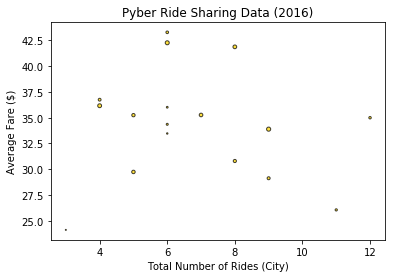

In [269]:
plt.scatter(result_rural_rideid, result_rural_fare, marker="o", facecolors="gold", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (City)")
plt.ylabel("Average Fare ($)")
plt.show

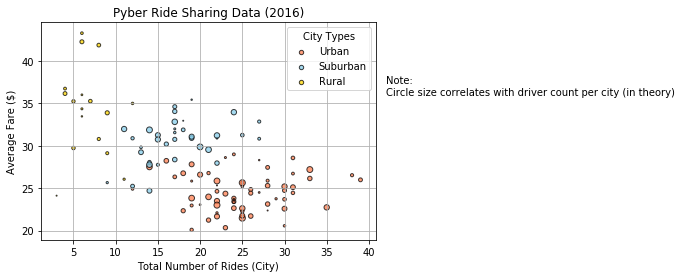

In [270]:
plt.scatter(result_urban_rideid, result_urban_fare, marker="o", facecolors="coral", edgecolors="black",
            s=x_axis, alpha=0.75, label="Urban")
plt.scatter(result_suburban_rideid, result_suburban_fare, marker="o", facecolors="skyblue", edgecolors="black",
            s=x_axis, alpha=0.75, label="Suburban")
plt.scatter(result_rural_rideid, result_rural_fare, marker="o", facecolors="gold", edgecolors="black",
            s=x_axis, alpha=0.75, label="Rural")
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (City)")
plt.ylabel("Average Fare ($)")
plt.legend(loc="upper right", title='City Types')
plt.text(42,36, "Note:\nCircle size correlates with driver count per city (in theory)")
plt.grid()
plt.show
plt.savefig("ride_sharing_data.png")

# Total Fares by City Type

In [271]:
total_fare = ride_city_data_df.groupby(['type'])
sum_total_fare = total_fare["fare"].sum()
sum_total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [272]:
sum_total_fare_df = pd.DataFrame(sum_total_fare)
sum_total_fare_df

,fare
type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


In [273]:
sum_total_fare_df['type'] = sum_total_fare_df.index
sum_total_fare_df

,fare,type
type,,
Rural,4327.93,Rural
Suburban,19356.33,Suburban
Urban,39854.38,Urban


In [274]:
fare_value = sum_total_fare_df["fare"].tolist()
fare_value

[4327.930000000002, 19356.330000000013, 39854.380000000085]

In [275]:
city_type = sum_total_fare_df["type"].tolist()
city_type

['Rural', 'Suburban', 'Urban']

In [276]:
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.05)

(-1.105020476229793,
 1.1500702619703531,
 -1.1101792756853153,
 1.1502054489213691)

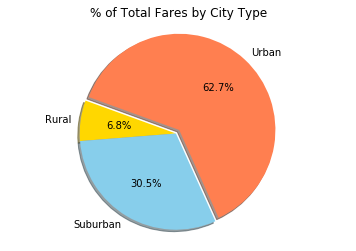

In [277]:
plt.pie(fare_value, explode=explode, labels=city_type, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Fares by City Type")
plt.axis("equal")

In [278]:
# Show Figure
plt.show()
plt.savefig("Fares_City.png")

<Figure size 432x288 with 0 Axes>

# Total Rides by City Type

In [279]:
total_rides = ride_city_data_df.groupby(['type'])
sum_total_rides = total_rides["ride_id"].count()
sum_total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [280]:
count_total_rides_df = pd.DataFrame(sum_total_rides)
count_total_rides_df

,ride_id
type,
Rural,125
Suburban,625
Urban,1625


In [281]:
count_total_rides_df['type'] = count_total_rides_df.index
count_total_rides_df

,ride_id,type
type,,
Rural,125,Rural
Suburban,625,Suburban
Urban,1625,Urban


In [282]:
ride_value = count_total_rides_df["ride_id"].tolist()
ride_value

[125, 625, 1625]

In [283]:
city_type = count_total_rides_df["type"].tolist()
city_type

['Rural', 'Suburban', 'Urban']

In [284]:
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.05)

(-1.1051621125974946,
 1.1562308724721553,
 -1.1094390796735702,
 1.1482086922148849)

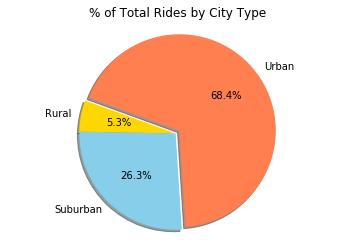

In [285]:
plt.pie(ride_value, explode=explode, labels=city_type, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

In [286]:
# Show Figure
plt.show()
plt.savefig("Rides_City.png")

<Figure size 432x288 with 0 Axes>

# Total Drivers by City Type

In [287]:
driver_count = city_data_df.groupby(['type'])
sum_driver_count = driver_count["driver_count"].sum()
sum_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [288]:
sum_driver_count_df = pd.DataFrame(sum_driver_count)
sum_driver_count_df

,driver_count
type,
Rural,78
Suburban,490
Urban,2405


In [289]:
driver_count = sum_driver_count_df["driver_count"].tolist()
driver_count

[78, 490, 2405]

In [290]:
sum_driver_count_df['type'] = sum_driver_count_df.index
sum_driver_count_df

,driver_count,type
type,,
Rural,78,Rural
Suburban,490,Suburban
Urban,2405,Urban


In [291]:
city_type = sum_driver_count_df["type"].tolist()
city_type

['Rural', 'Suburban', 'Urban']

In [292]:
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.05)

(-1.118278213781198,
 1.1566807978273996,
 -1.0934222771494166,
 1.1168892951339475)

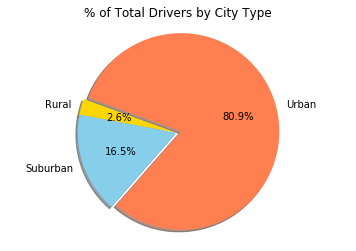

In [293]:
plt.pie(driver_count, explode=explode, labels=city_type, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

In [294]:
# Show Figure
plt.show()
plt.savefig("Drivers_City.png")

<Figure size 432x288 with 0 Axes>

From the above charts, I can conclude (as expected):
* Urban city type is the highest on all items.
* The drivers rate in urban city type is bigger because the demand is higher than the others.
* The fares in urban are expensive than suburban and rural due to the distances and time spent on it.